1. Objetivo do Notebook

Este notebook tem como objetivo analisar a evolução da produção e da comercialização do caju e da castanha de caju no Brasil, ao longo dos últimos anos, atendendo ao primeiro objetivo específico do projeto de pesquisa.

A análise busca identificar tendências, ciclos de crescimento ou retração e mudanças estruturais no desempenho produtivo e econômico da cajucultura brasileira, servindo de base para comparações regionais e para a interpretação administrativa dos resultados.

2. Relação com o Projeto de Pesquisa

Este notebook responde diretamente ao objetivo específico:

Avaliar a evolução da produção e comercialização do caju no Brasil nos últimos anos.

Os resultados aqui obtidos subsidiam a discussão sobre a contribuição da cajucultura para o PIB agroindustrial, bem como sobre os desafios estruturais e administrativos enfrentados pelo setor em nível nacional.

3. Base de Dados Utilizada

Pesquisa Agrícola Municipal (PAM/IBGE)

Dataset principal:

1. serie_historica_caju_castanha_brasil.csv

As variáveis analisadas incluem, entre outras:

- Ano
- Produção (toneladas)
- Área colhida (hectares)
- Valor da produção (R$)
- Produtividade média

4. Importação das Bibliotecas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100
sns.set_style("whitegrid")

5. Carregamento da Base Histórica Nacional

In [2]:
BASE_PATH = Path("..") / "Pesquisa Agrícola Municipal (PAM)"
def load_csv(filename):
    return pd.read_csv(
        BASE_PATH / filename,
        sep=",",
        encoding="latin1"
    )


serie_historica = load_csv("1. serie_historica_caju_castanha_brasil.csv")

6. Inspeção Inicial dos Dados

- Esta etapa permite verificar a estrutura da base, tipos de dados, presença de valores ausentes e coerência temporal das informações.


In [4]:
serie_historica.head()
serie_historica.info()


<class 'pandas.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   102 non-null    int64  
 1   produto               102 non-null    str    
 2   producao_total        51 non-null     float64
 3   valor_total_producao  51 non-null     float64
dtypes: float64(2), int64(1), str(1)
memory usage: 3.3 KB


7. Tratamento e Padronização Inicial dos Dados

In [7]:
serie_historica.columns = (
    serie_historica.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

serie_historica["ano"] = serie_historica["ano"].astype(int)
serie_historica["produto"] = serie_historica["produto"].str.strip()


GRÁFICO 1 — Evolução da produção TOTAL (Brasil)

In [9]:


plt.rcParams.update({
    "figure.figsize": (11, 6),
    "figure.dpi": 110,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.alpha": 0.3,
})


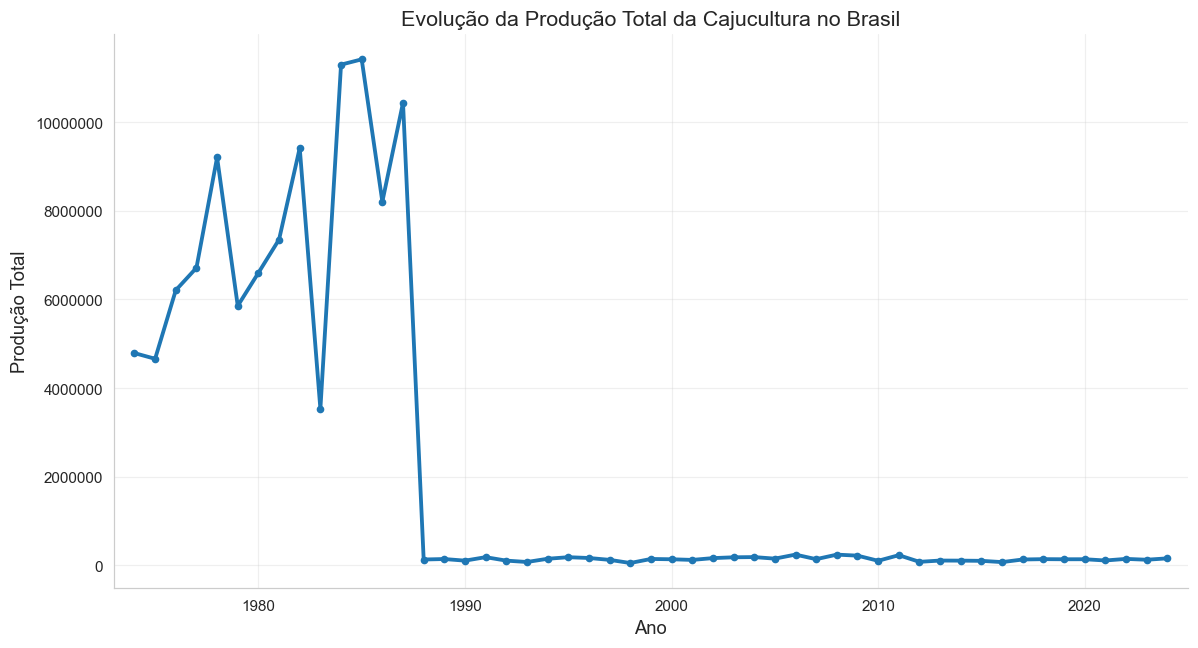

In [10]:
producao_total_ano = (
    serie_historica
    .groupby("ano", as_index=False)["producao_total"]
    .sum()
    .sort_values("ano")
)


fig, ax = plt.subplots()

ax.plot(
    producao_total_ano["ano"],
    producao_total_ano["producao_total"],
    linewidth=2.5,
    marker="o",
    markersize=4
)

ax.set_title("Evolução da Produção Total da Cajucultura no Brasil")
ax.set_xlabel("Ano")
ax.set_ylabel("Produção Total")

ax.ticklabel_format(style="plain", axis="y")
ax.margins(x=0.02)

plt.tight_layout()
plt.show()


1. O Gráfico 1 evidencia que a produção total da cajucultura no Brasil apresenta comportamento fortemente irregular ao longo do tempo, podendo ser dividida em três fases distintas.

Até meados da década de 1980, observa-se uma tendência geral de crescimento, acompanhada de elevada volatilidade, com oscilações abruptas entre anos consecutivos. Esse padrão indica que, embora houvesse expansão da atividade, ela ocorria de forma instável, possivelmente influenciada por condições climáticas adversas, baixa padronização produtiva e fragilidades estruturais. A partir do final da década de 1980, ocorre uma queda abrupta e persistente no nível da produção total, configurando uma quebra estrutural da série temporal. Após esse ponto, a produção passa a operar em um patamar significativamente inferior ao observado anteriormente, com oscilações mais suaves e ausência de tendência clara de crescimento. Do ponto de vista estatístico, essa mudança indica que o comportamento produtivo da cajucultura brasileira deixou de ser expansivo e passou a ser caracterizado por estagnação em longo prazo.

2. Interpretação administrativa

Sob a ótica da Administração, o comportamento observado no Gráfico 1 sugere que o crescimento produtivo inicial não foi sustentado por bases administrativas sólidas.

A elevada volatilidade do período inicial indica:

- fragilidade na gestão da produção;
- ausência de planejamento de longo prazo;
- forte dependência de fatores exógenos, como clima e conjuntura.

A quebra estrutural observada a partir do final dos anos 1980 evidencia que o setor não conseguiu consolidar o crescimento alcançado, o que sugere falhas na articulação entre produção, beneficiamento, logística e mercado.

Do ponto de vista administrativo, isso revela uma cadeia produtiva:

- pouco resiliente;
- com baixa capacidade de adaptação;
- dependente de políticas públicas descontínuas.

 Esses fatores limitam a contribuição estrutural da cajucultura para o desenvolvimento econômico e para o fortalecimento do agronegócio nacional.

Gráfico 2: Evolução da Produção por Produto (Caju × Castanha) – Brasil

In [11]:
producao_produto = (
    serie_historica
    .groupby(["ano", "produto"], as_index=False)["producao_total"]
    .sum()
    .sort_values("ano")
)

producao_produto.head()


,ano,produto,producao_total
0,1974,Caju,4789822.0
1,1974,Castanha de caju,0.0
2,1975,Caju,4661289.0
3,1975,Castanha de caju,0.0
4,1976,Caju,6207889.0


In [12]:
producao_produto["produto"] = (
    producao_produto["produto"]
    .str.strip()
    .str.title()
)


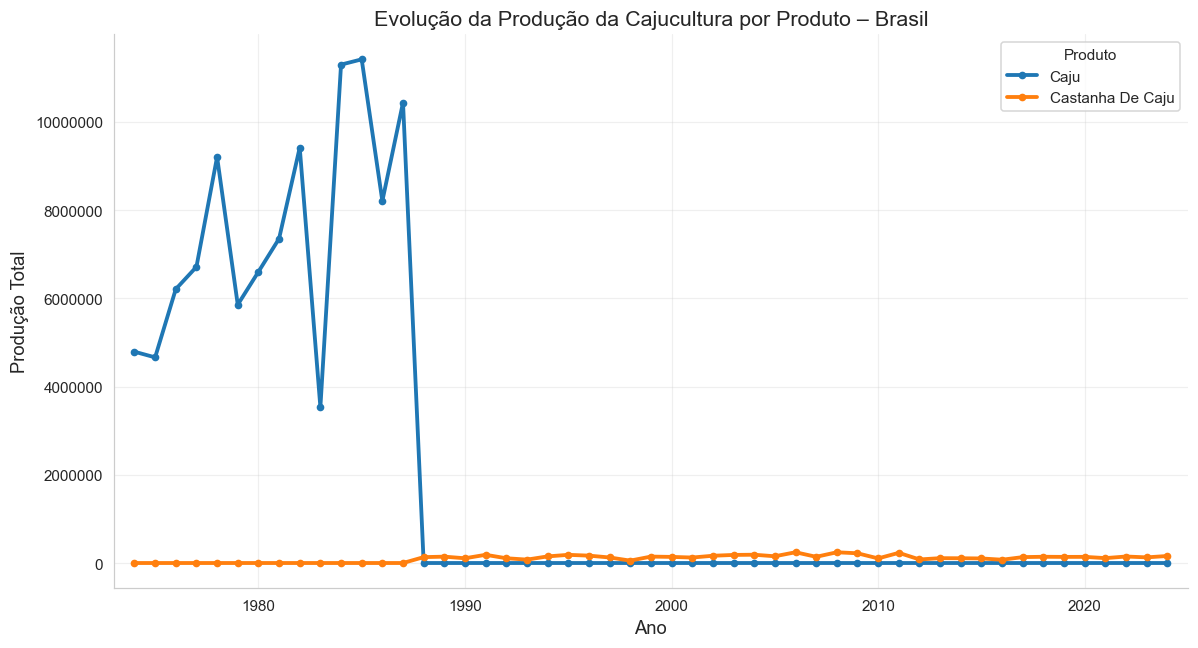

In [13]:
fig, ax = plt.subplots()

for produto, df_prod in producao_produto.groupby("produto"):
    ax.plot(
        df_prod["ano"],
        df_prod["producao_total"],
        linewidth=2.5,
        marker="o",
        markersize=4,
        label=produto
    )

ax.set_title("Evolução da Produção da Cajucultura por Produto – Brasil")
ax.set_xlabel("Ano")
ax.set_ylabel("Produção Total")

ax.legend(title="Produto")
ax.ticklabel_format(style="plain", axis="y")
ax.margins(x=0.02)

plt.tight_layout()
plt.show()


1. O Gráfico 2 evidencia uma mudança estrutural e metodológica na forma de mensuração da cajucultura brasileira.

Até 1987, observa-se a coexistência de duas séries:

- o caju (pseudofruto), com volumes elevados e elevada volatilidade;
- a castanha de caju, com volumes significativamente menores.

A partir de 1988, a série referente ao pseudofruto praticamente desaparece, enquanto a castanha de caju passa a concentrar integralmente a produção registrada. Essa mudança não representa um colapso produtivo real, mas sim uma alteração conceitual e metodológica nos registros oficiais. No período posterior, a produção de castanha de caju apresenta relativa estabilidade, com oscilações moderadas e ausência de crescimento expressivo de longo prazo.

2. Interpretação administrativa

Do ponto de vista administrativo, a descontinuidade do registro do pseudofruto reflete uma opção econômica racional, orientada pelo maior valor agregado, maior viabilidade logística e maior inserção industrial da castanha de caju. Entretanto, o comportamento da série após essa mudança indica que a especialização produtiva não foi acompanhada por avanços estruturais suficientes para promover crescimento sustentado. A estabilidade observada sugere limitações relacionadas a:

- baixa modernização produtiva;
- envelhecimento dos pomares;
- insuficiência de investimentos;
- fragilidades na gestão da cadeia.

Assim, a especialização na castanha, embora necessária, mostrou-se insuficiente para impulsionar a competitividade e a expansão econômica do setor.


Gráfico 3 — Evolução do Valor da Produção da Cajucultura no Brasil

In [14]:
valor_total_ano = (
    serie_historica
    .groupby("ano", as_index=False)["valor_total_producao"]
    .sum()
    .sort_values("ano")
)

valor_total_ano.head()


,ano,valor_total_producao
0,1974,0.0
1,1975,0.0
2,1976,0.0
3,1977,0.0
4,1978,0.0


In [15]:
valor_total_ano["valor_total_producao"] = (
    valor_total_ano["valor_total_producao"]
    .astype(float)
)


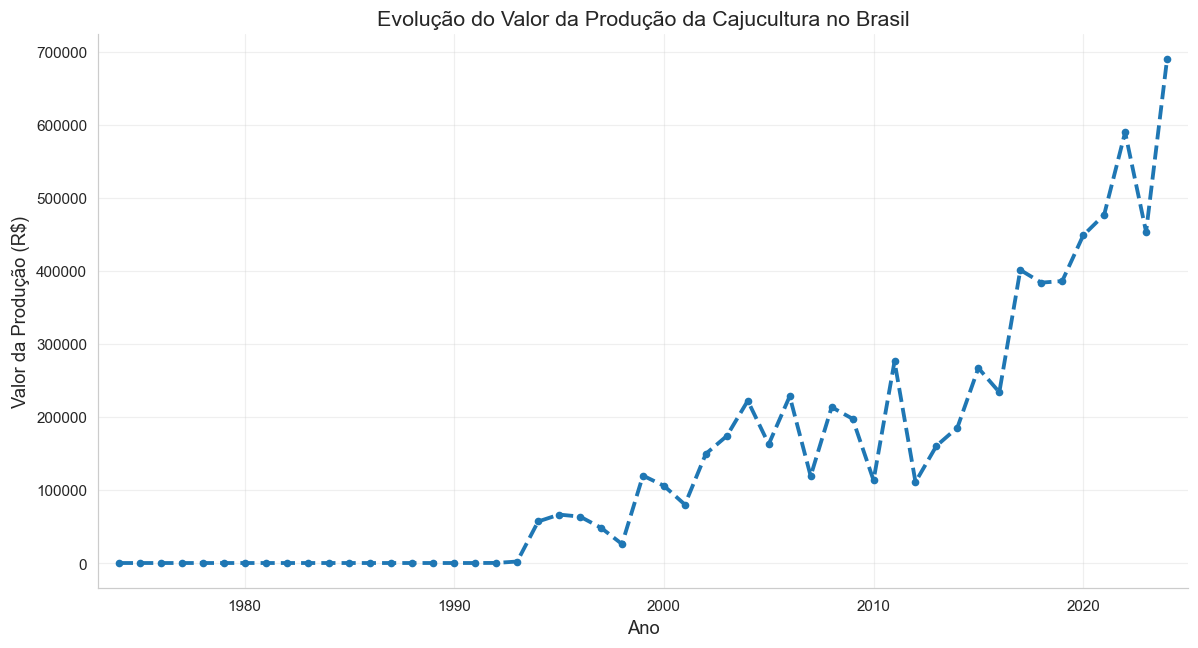

In [16]:
fig, ax = plt.subplots()

ax.plot(
    valor_total_ano["ano"],
    valor_total_ano["valor_total_producao"],
    linewidth=2.5,
    marker="o",
    markersize=4,
    linestyle="--"
)

ax.set_title("Evolução do Valor da Produção da Cajucultura no Brasil")
ax.set_xlabel("Ano")
ax.set_ylabel("Valor da Produção (R$)")

ax.ticklabel_format(style="plain", axis="y")
ax.margins(x=0.02)

plt.tight_layout()
plt.show()


1. Do ponto de vista técnico, o Gráfico 3 revela uma trajetória claramente distinta daquela observada para a produção física.

Até o início da década de 1990, o valor da produção da cajucultura apresenta níveis muito baixos ou praticamente nulos, o que pode estar associado a:

- limitações nos registros econômicos;
- baixa integração da atividade ao mercado formal;
- menor relevância monetária atribuída à cultura nesse período.

A partir da década de 1990, observa-se uma elevação gradual do valor da produção, ainda com oscilações consideráveis. Esse comportamento indica um período de transição econômica, no qual a cajucultura passa a ganhar maior visibilidade monetária, embora sem trajetória estável. A partir dos anos 2000, o gráfico evidencia uma tendência clara de crescimento do valor da produção, com aceleração mais pronunciada a partir da década de 2010. Mesmo com flutuações anuais, o comportamento geral é ascendente, indicando valorização econômica contínua da atividade.

Destaca-se que esse crescimento ocorre sem correspondência direta com aumentos expressivos da produção física, conforme observado nos Gráficos 1 e 2.

2. Interpretação administrativa e econômica

Sob a ótica da Administração, o Gráfico 3 sugere que a dinâmica recente da cajucultura brasileira tem sido impulsionada mais por fatores de mercado do que por ganhos produtivos.

O crescimento do valor da produção, em contraste com a estabilidade da produção física, indica:

- aumento dos preços da castanha de caju;
- maior inserção do produto em mercados nacionais e internacionais;
- valorização comercial associada à demanda industrial e à exportação.

Entretanto, esse comportamento também revela uma limitação estrutural da cadeia produtiva, uma vez que a expansão econômica não é acompanhada por:

- aumento de produtividade;
- expansão da área colhida;
- modernização tecnológica consistente.

3. Do ponto de vista administrativo, isso caracteriza uma estratégia econômica reativa, dependente de condições externas (preços e mercado), e não de uma estratégia proativa, baseada em eficiência, gestão e inovação.

Implicações para o desempenho econômico e o PIB agroindustrial. A trajetória observada no Gráfico 3 indica que a contribuição da cajucultura para o PIB agroindustrial brasileiro ocorre predominantemente por meio do efeito-preço, e não por crescimento real da atividade.

Esse padrão limita:

- o impacto multiplicador da atividade sobre emprego e renda;
- a geração de economias de escala;
- a capacidade de induzir desenvolvimento regional sustentável.

Assim, embora o valor monetário da produção tenha crescido de forma significativa, esse crescimento não reflete necessariamente fortalecimento estrutural da cadeia produtiva, reforçando a importância de políticas públicas e estratégias administrativas voltadas à eficiência e à agregação de valor.